In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 

In [4]:
from textblob import TextBlob

In [3]:
text_df = pd.read_csv('stockpred_without_stopwords.csv')
text_df.head()

,text_corpus,Date,Label
0,georgia down two russian warplane as country m...,2008-08-08,0
1,why will not america and nato help us if they ...,2008-08-11,1
2,remember that adorable year old who sing at th...,2008-08-12,0
3,u s refuse israel weapon to attack iran report...,2008-08-13,0
4,all the expert admit that we should legalise d...,2008-08-14,1


In [5]:
sentiment_scores_tb = [round(TextBlob(headline).sentiment.polarity, 3) for headline in text_df['text_corpus']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [6]:
df = pd.DataFrame([list(text_df['Label']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['Label', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['Label']).describe()

sentiment_score                                                       
                count      mean       std    min    25%    50%    75%    max
Label                                                                       
0               924.0  0.031610  0.054169 -0.148 -0.004  0.032  0.068  0.210
1              1065.0  0.034348  0.052658 -0.194  0.003  0.037  0.069  0.215

In [7]:
df

,Label,sentiment_score,sentiment_category
0,0,-0.055,negative
1,1,0.118,positive
2,0,-0.080,negative
3,0,-0.016,negative
4,1,0.120,positive
...,...,...,...
1984,0,0.000,neutral
1985,1,0.038,positive
1986,1,0.121,positive
1987,1,-0.004,negative


In [9]:
df[df['Label'] == 0]['sentiment_category'].value_counts()

positive    663
negative    253
neutral       8
Name: sentiment_category, dtype: int64

In [10]:
df[df['Label'] == 1]['sentiment_category'].value_counts()

positive    808
negative    252
neutral       5
Name: sentiment_category, dtype: int64

In [16]:
# Finding percentage of negative sentiment in news when market is down
df[df['Label'] == 0]['sentiment_category'].value_counts()[1]/len(df[df['Label'] == 0])

0.27380952380952384

In [17]:
# Finding percentage of positive sentiment in news when market is up
df[df['Label'] == 1]['sentiment_category'].value_counts()[0]/len(df[df['Label'] == 1])

0.7586854460093897

In [18]:
# Finding percentage of positive sentiment in news when market is down
df[df['Label'] == 0]['sentiment_category'].value_counts()[0]/len(df[df['Label'] == 0])

0.7175324675324676

C:\Users\shubhanshu gupta\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


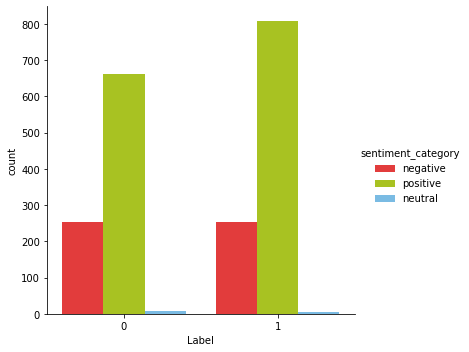

In [19]:
sns.factorplot(x="Label", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

It does not tell much as there is almost 70% positive sentiments when the market is both up and down.

## Trying Sentimental analysis using Unsupervised learning